In [1]:
import pandas as pd
import numpy as np
from scipy.sparse.csgraph import reverse_cuthill_mckee
from scipy.sparse import csr_matrix
import matplotlib.pylab as plt
import scipy.sparse as sps

In [2]:
my_cols = [x for x in range(0,32)]
df = pd.read_csv('groceries.csv',names=my_cols, engine='python')
df_dummies = pd.get_dummies(df)
#df_dummies

In [3]:
# create new dataframe with union column same item
#df[~df[31].isnull()]
#df_dummies[df_dummies['31_candles']==1]
#df_dummies.add_suffix(columns[0])


In [4]:
# search all items
columns = list()
for column in df_dummies.columns:
    for column_1 in df_dummies.columns:
        if(column != column_1 and column.split('_')[1] == column_1.split('_')[1] and column.split('_')[1] not in columns ):
            columns.append(column.split('_')[1])

# remove duplicate
columns = list(set(columns))  
zero_data = np.zeros(shape=(len(df_dummies),len(columns)))
df_new = pd.DataFrame(zero_data, columns=columns,dtype='uint8')
# qualcosa non val alcuni sono valori maggiori di 1
# create a transactional data
for column in df_dummies.columns:
    for column_1 in df_dummies.columns:
        if(column != column_1 and column.split('_')[1] == column_1.split('_')[1]):
            if(column.split('_')[0]=='0'):
                colonna_new  = column.split('_')[1]
                if(len(df_new.index[df_new[colonna_new] > 0].tolist())==0):
                    df_new[colonna_new]=df_new[colonna_new] + df_dummies[column] + df_dummies[column_1]
                else:
                    df_new[colonna_new] = df_new[colonna_new] + df_dummies[column_1]
                #print(df_new[colonna_new])
                    

In [5]:
# ora bisogn aaggiungere len(df) -len(columns) item finti con vlori tutti 0 
# per avere una matrice quadrata (vedi paper)

In [6]:
len(columns)

166

In [17]:
order.tolist()
for k in order.tolist():
    print(columns[k])

female sanitary products
mustard
light bulbs
toilet cleaner
specialty fat
specialty cheese
kitchen utensil
curd cheese
bags
sauces
canned fruit
flower (seeds)
flower soil/fertilizer
tea
baby cosmetics
cocoa drinks
meat
whisky
rubbing alcohol
pet care
Instant food products
pot plants
sliced cheese
softener
liqueur
processed cheese
onions
dish cleaner
jam
herbs
cat food
salt
pudding powder
specialty chocolate
nuts/prunes
vinegar
rum
butter milk
make up remover
soups
liquor
popcorn
ready soups
potato products
hair spray
cream
dog food
photo/film
beef
brandy
rice
cooking chocolate
spread cheese
chocolate marshmallow
specialty vegetables
male cosmetics
kitchen towels
instant coffee
citrus fruit
pasta
tidbits
soap
flour
frozen potato products
bathroom cleaner
sweet spreads
salad dressing
berries
artif. sweetener
liquor (appetizer)
canned vegetables
zwieback
nut snack
honey
syrup
pork
mayonnaise
abrasive cleaner
frozen fruits
fruit/vegetable juice
margarine
semi-finished bread
turkey
newspape

In [26]:
# df_new.head(166)
df_truncate = df_new.head(166)
sparse = csr_matrix(df_truncate)
order = reverse_cuthill_mckee(sparse)
#print(columns[order.tolist()])

In [27]:
print(order)

[129  90  36  16   0 114 126 113  42 134 132  70 145  47  13 104  89  15
  59 121 138 124  48  88  82 100  14  99  40  39 127  51  19 155   1  86
  79   2 116  76 160 142  68  62 143  22 112 157  84  78  77 162 102  25
  29 111  98  56   6 137  80  95 122  91  37 156  57  73  50  71 144 118
  92 106  85  12 147  34  23  35  67   8  94 109 115  69   3  63 140  93
  44  61 108 101 128  96 120 159 107  66  55 163   5  21   9 136 125  27
 139 149 130 105 151  11 152 148  17  43  58  45  74 131  30 165  18  65
  41 103  72 161  54  83  26 133  46  38 119  97  81  24 154  33   7  87
  53 158 146  49 110  75  60 153 117  31 150 123  64  32  20 141  10 164
 135   4  52  28]


In [25]:
# order RCM
df_truncate.iloc[order][order]

,female sanitary products,mustard,light bulbs,toilet cleaner,specialty fat,specialty cheese,kitchen utensil,curd cheese,bags,sauces,...,ham,fish,beverages,soft cheese,decalcifier,organic products,white wine,frozen fish,other vegetables,frozen chicken
129,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
90,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


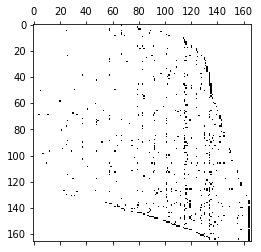

In [19]:
#M = sps.csr_matrix(df_truncate.iloc[order])
# sparse matrix
new_df = df_truncate.iloc[order][order]
plt.spy(new_df)
plt.show()

In [17]:
# df_truncate.to_csv("data.csv",header=False,index=False)

In [10]:
# aggiungiamo item fittizi per avere una matrice quadrata
# il problema è che aggiungengo troppi zeri si perde troppo utilità (NB gli item son 160)
zero_data_to_add = np.zeros(shape=(len(df_dummies),len(df_dummies)-len(columns)))
columns_to_add = [x for x in range(0,len(df_dummies)-len(columns))] 
df_to_add = pd.DataFrame(zero_data_to_add, columns=columns_to_add,dtype='uint8')


In [11]:
# quindi riduciamo il tutto a 200 righe e 200 colonne
# and save in a file
df_new_complete = pd.concat([df_new, df_to_add], axis=1)
df_complete_200 = df_new_complete.iloc[:200,:200]
df_complete_200.to_csv("data_complete_200.csv",header=False,index=False)


In [12]:
df_complete_200.head()

,sliced cheese,semi-finished bread,jam,decalcifier,canned vegetables,flower soil/fertilizer,roll products,brandy,frozen chicken,ketchup,...,24,25,26,27,28,29,30,31,32,33
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
print(len(df_complete_200))
print(len(df_complete_200.iloc[1]))

200
200


In [15]:
# save dataset complete in 1000x1000
df_new_complete.to_csv("data_complete.csv",header = False,index=False)

In [20]:
# dataframe dopo RCM
[i,j]=np.where(df_truncate.loc[order][order] == 1)
bw = max(i-j) +1
print(bw)
[i,j]=np.where(df_truncate == 1)
bw = max(i-j) +1
print(bw)

106